In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D


from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
#loading dataset using pd
data=pd.read_csv("data.csv")

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

#displaying data content
data.info(verbose=True, null_counts=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#dropping unnamed 32 
#data.drop(['Unnamed: 32'], axis=1)

del data['Unnamed: 32']


#checking if column dropped successfully
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


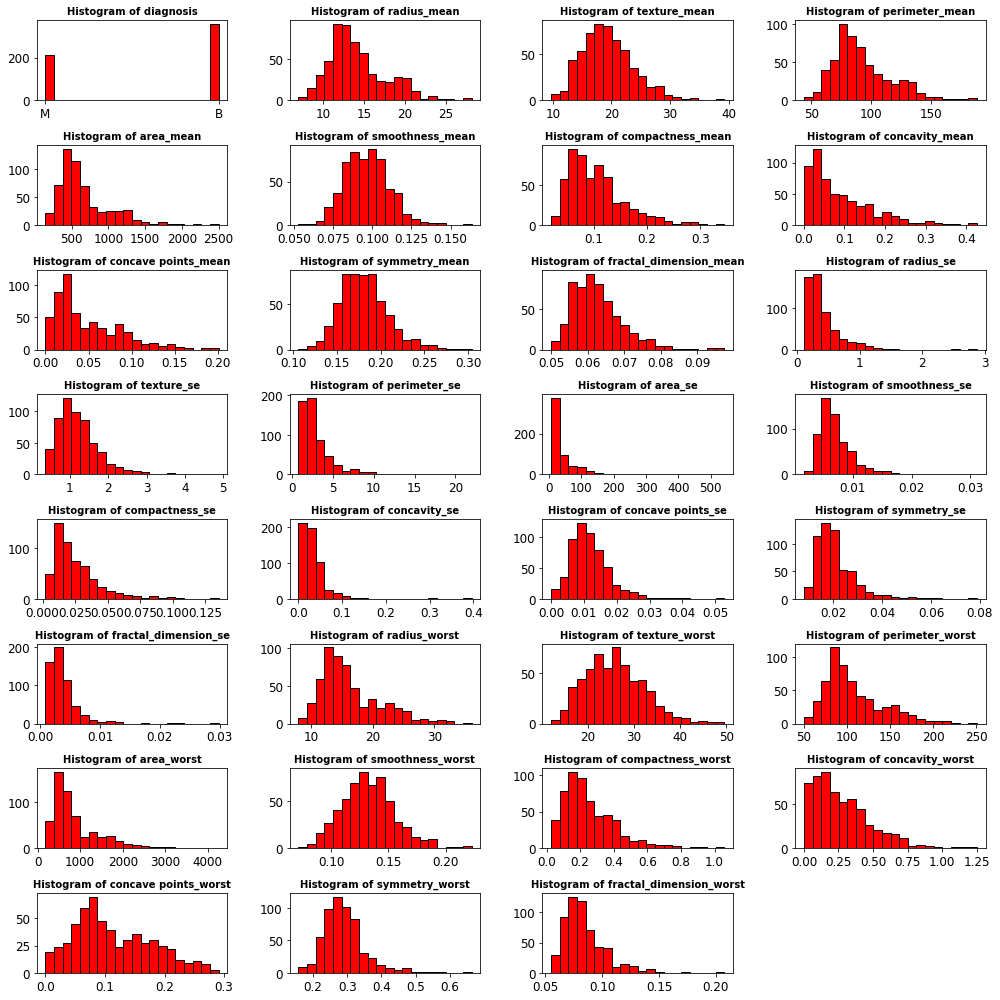

In [ ]:
#plotting feature distribution using histogram
i=1
plt.figure(figsize=(14,14))
for col in data.columns[1:]:
    plt.subplot(8,4,i)
    plt.title(f"Histogram of {col}", fontsize=10, weight='heavy')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(data[col], bins=20, 
             color="red", edgecolor='k')
    i+=1
    
plt.tight_layout()

More Benign samples than Malignant samples in the dataset.

In [ ]:
#exploring object datatype 
data.diagnosis.unique()


#once target converted to binary then:
# M=malignant=0
# B=bengign=1

array(['M', 'B'], dtype=object)

In [ ]:
#converting categorical data into binary vector
data=pd.concat([data,pd.get_dummies(data.diagnosis,
                                   prefix='diagnosis',drop_first=True)],
              axis=1)

dummy_data=list(pd.get_dummies(data.diagnosis, prefix='diagnosis',
                              drop_first=True).columns)


#checking if diagnosis column successfully converted to binary 
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [ ]:
#setting the feature set to variable x
x=data.drop(['diagnosis', "diagnosis_M"], axis=1)
#isolating the target variables to variable y
y=data['diagnosis_M']


#splitting train and test 
x_train, x_test, y_train, y_test=train_test_split(x, y,
                                                  test_size=0.2,
                                                  random_state=24,
                                                  stratify=y)

print(x.shape)
print(len(y))

(569, 31)
569


In [ ]:
x_train_shape=x_train.shape
x_test_shape=x_test.shape

print(f"Shape of x_train: {x_train_shape}")
print(f"Shape of x_test: {x_test_shape}")

Shape of x_train: (455, 31)
Shape of x_test: (114, 31)


As shown above the shape of the data is two dimensional. To be able to apply Convolutioanl Neural Network (CNN), need to convert 2D data to 3D. To convert 2D to 3D; reshape, but first need to standarized values using StandardScaler. 

In [ ]:
#applying standarscaler to normalize data
#applying sc will convert data to numpy arrays.
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train=x_train.reshape(455, 31, 1)
x_test=x_test.reshape(114, 31, 1)

In [ ]:
#building model
model=Sequential()



model.add(Conv1D(filters=8, kernel_size=2, activation="relu", 
                 input_shape=(31, 1)))
#Using batch normalization between convolutions to make model more stable during training.
model.add(BatchNormalization()) 


model.add(Conv1D(filters=16, kernel_size=2, activation="relu", 
                 input_shape=(31, 1)))
model.add(BatchNormalization())


model.add(Conv1D(filters=32, kernel_size=2, 
                 activation="relu", input_shape=(31, 1)))
model.add(BatchNormalization())



model.add(Conv1D(filters=64, kernel_size=2, 
                 activation="relu", input_shape=(31, 1)))
model.add(BatchNormalization())


model.add(Conv1D(filters=128, kernel_size=2, 
                 activation="relu", input_shape=(31, 1)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(64, activation="relu"))


model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 8)             24        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 8)             32        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29, 16)            272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 16)            64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 32)            128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 64)            4

In [ ]:
#compiling model
#instantiating optimizer, using default lr==0.001 
model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])


In [ ]:
#training the model

#setting "verbose=1" prints out results after each epoch
fit_model=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1) 

Epoch 1/50
15/15 [==============================] - 2s 54ms/step - loss: 0.2985 - accuracy: 0.8371 - val_loss: 0.5859 - val_accuracy: 0.9211
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0251 - accuracy: 0.9885 - val_loss: 0.5296 - val_accuracy: 0.8772
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4781 - val_accuracy: 0.8684
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4321 - val_accuracy: 0.8684
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.4045 - val_accuracy: 0.8070
Epoch 6/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0165 - accuracy: 0.9901 - val_loss: 0.3345 - val_accuracy: 0.9211
Epoch 7/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2732 - val_accuracy: 0.9211
Epoch 8/50
15

* On the 3 epoch/stage and onward, the accuracy score is 1 or 100%, which may indicate overfitting. 

* The validation accuracy score indicates the model performed well resulting in 97% at the 50 epoch/stage.

In [ ]:
#after training model, now evaluating the test set to determine how well the training model performed
score=model.evaluate(x_test, y_test, verbose=0)

#printing what is contained in the evaluate function 
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(score)

print("\nTest Loss:", score[0])
print(f"Test Accuracy:", score[1])

[0.12689757347106934, 0.9736841917037964]

Test Loss: 0.12689757347106934
Test Accuracy: 0.9736841917037964


In [ ]:
#fit_model.history

* Using 50 epochs at 0.001 lr results in an accuracy score of 100% on the train set and 97% on the validation(test) set. 
* Next checking if model is overfitting by comparing the accuracy score and loss scores for the test(validation) dataset and train dataset.

In [ ]:
epochs=50

def plot_learningcurve(model_fit, epoch):
#plotting training and accuracy scores 
  epoch_range=range(1, epoch+1)
  plt.plot(epoch_range, fit_model.history["accuracy"])
  plt.plot(epoch_range, fit_model.history["val_accuracy"])
  plt.title("Model Accuracy", weight='heavy')
  plt.ylabel("Accuracy", weight='heavy')
  plt.xlabel("Epoch", weight='heavy')
  plt.legend(["Train", "Validation"], loc="lower right")
  plt.show()


#plotting training and validatation loss 
  plt.plot(epoch_range, fit_model.history["loss"])
  plt.plot(epoch_range, fit_model.history["val_loss"])
  plt.title("Model Loss", weight="heavy")
  plt.ylabel("Loss", weight="heavy")
  plt.xlabel("Epoch", weight="heavy")
  plt.legend(["Train", "Validation"],loc="upper right")
             
             #loc="upper right")
  plt.show()

<p> Overfitting occurs when training accuracy <font color="red"><b> > </b></font color>  test (validation) accuracy. </p> <br>

<p>Overfitting occurs when training loss <font color="red"><b> <  </b></font color> test (validation) loss. </p>

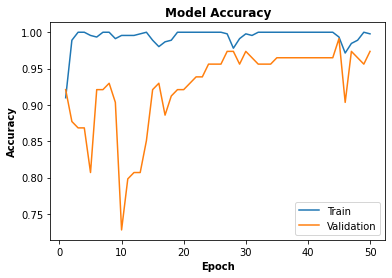

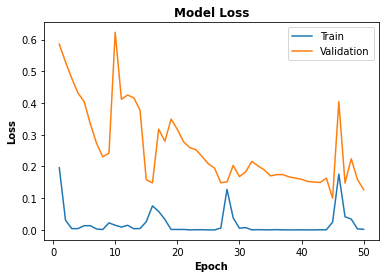

In [ ]:
plot_learningcurve(fit_model, epochs)

The train accuracy score is greater than the validation accuracy score. The train loss is smaller than the test(validation) loss. This means that the model is overfitting, however, the train accuracy and the test accuracy have very close results so there is only slight overfitting, which is acceptable. 


* Next incorporating "Dropout" and increasing learning rate on the next model to test whether accuracy score improves and loss score is further minimized. 


In [ ]:
#building model
model=Sequential()



model.add(Conv1D(filters=8, kernel_size=2, activation="relu", 
                 input_shape=(31, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) #25% neurons


model.add(Conv1D(filters=16, kernel_size=2, activation="relu", 
                 input_shape=(31, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.30)) #30% neurons


model.add(Conv1D(filters=32, kernel_size=2, 
                 activation="relu", input_shape=(31, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.30)) 

model.add(Conv1D(filters=64, kernel_size=2, 
                 activation="relu", input_shape=(31, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.30)) 


model.add(Conv1D(filters=128, kernel_size=2, 
                 activation="relu", input_shape=(31, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.30)) 


model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.30))


model.add(Dense(1, activation="sigmoid"))

In [ ]:
#compiling model
#instantiating optimizer, using a different value for lr==0.01 
model.compile(optimizer=Adam(lr=0.01),
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

#training the model

#setting "verbose=1" prints out results after each epoch
fit_model_2=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1) 

Epoch 1/50
15/15 [==============================] - 2s 49ms/step - loss: 0.8945 - accuracy: 0.7597 - val_loss: 0.6675 - val_accuracy: 0.6491
Epoch 2/50
15/15 [==============================] - 0s 21ms/step - loss: 0.5946 - accuracy: 0.9318 - val_loss: 0.2479 - val_accuracy: 0.8772
Epoch 3/50
15/15 [==============================] - 0s 20ms/step - loss: 0.2867 - accuracy: 0.9379 - val_loss: 0.1432 - val_accuracy: 0.9649
Epoch 4/50
15/15 [==============================] - 0s 21ms/step - loss: 0.2218 - accuracy: 0.9413 - val_loss: 0.1665 - val_accuracy: 0.9386
Epoch 5/50
15/15 [==============================] - 0s 21ms/step - loss: 0.1682 - accuracy: 0.9394 - val_loss: 0.1395 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 0.1340 - accuracy: 0.9503 - val_loss: 0.1360 - val_accuracy: 0.9386
Epoch 7/50
15/15 [==============================] - 0s 21ms/step - loss: 0.1885 - accuracy: 0.9485 - val_loss: 0.1138 - val_accuracy: 0.9649
Epoch 8/50
15

* The accuracy scores on the training set does not reach 100%, so no sign of overfitting. 

* The validation accuracy score indicates that the model performed well. 

In [ ]:
#after training model, now evaluating the test set to determine how well the training model performed
score=model.evaluate(x_test, y_test, verbose=0)

print("Test Loss:", score[0])
print(f"Test Accuracy:", score[1])

Test Loss: 0.11346514523029327
Test Accuracy: 0.9824561476707458


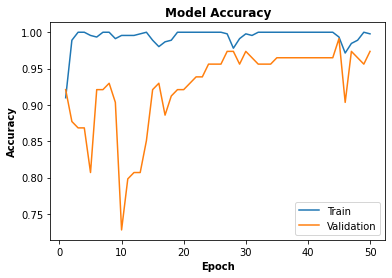

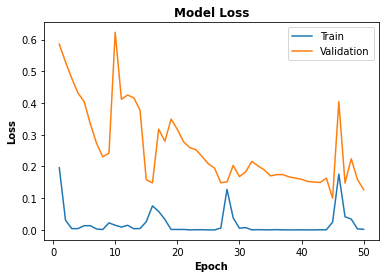

In [ ]:
plot_learningcurve(fit_model_2, epochs)

By assigning 25-30 Dropout and increasing learning rate to 0.01, the train accuracy score does not show signs of overfitting. From the graphs above, the train accuracy score is greater than the validation accuracy score. The train loss is smaller than the test(validation) loss. This means that the model is not overfitting. 
